In [ ]:
!pip install networkx
!pip install matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# !wget https://nrvis.com/download/data/soc/fb-pages-public-figure.zip
!unzip /content/fb-pages-public-figure.zip

Archive:  /content/fb-pages-public-figure.zip
  inflating: fb-pages-public-figure.edges  
  inflating: readme.html             
  inflating: fb-pages-public-figure.nodes  


In [ ]:
#@title Load the datset from Nodes and Edges files using nx

nodes_file = "/content/fb-pages-public-figure.nodes"
edges_file = "/content/fb-pages-public-figure.edges"

fbnodes_graph = nx.read_adjlist(nodes_file, delimiter=',', create_using=nx.Graph)

In [ ]:
#@title Data Info
print("# Nodes: "+ str(fbnodes_graph.number_of_nodes()))
print("# Undirected Edges: "+ str(fbnodes_graph.number_of_edges()))

# Nodes: 34754
# Undirected Edges: 23238


In [ ]:
#@title Explore loaded data 

print("Some Nodes:")
list(fbnodes_graph.nodes())[10:20]

Some Nodes:


['Pastor Everaldo',
 '7510',
 '251453648389404',
 '"Ronen Manelis דובר צה""ל רונן מנליס"',
 '2708',
 '1596076743971510',
 'QPark',
 '7349',
 '127489950631258',
 '凌星星']

In [ ]:
print("Some Edges:")
list(fbnodes_graph.edges())[10:20]

Some Edges:


[('1596076743971510', 'QPark'),
 ('1596076743971510', '7349'),
 ('127489950631258', '凌星星'),
 ('127489950631258', '2839'),
 ('127749457401399', 'Token Black'),
 ('127749457401399', '7684'),
 ('164861976892531', 'JTodd Tucker'),
 ('164861976892531', '10428'),
 ('209848971662', 'Darrell Hines'),
 ('209848971662', '4378')]

In [ ]:
#@title Visualize the graph
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

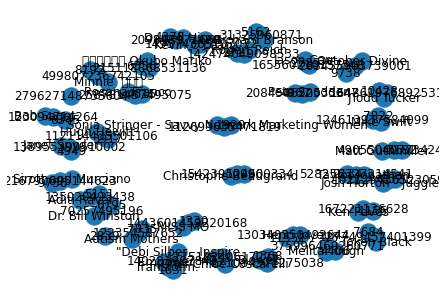

In [ ]:
sub_list = list(fbnodes_graph.nodes())[20:500]
fb_sub_graph = nx.subgraph(fbnodes_graph, sub_list[:100])
nx.draw(fb_sub_graph, with_labels=True)

In [ ]:
#@title Degree & Degree Centrality (fb_sub_graph)
fb_sub_graph2 = nx.subgraph(fbnodes_graph, sub_list[:20])
print("Degree (of 1st 20):")
nx.degree(fb_sub_graph2)

Degree (of 1st 20):


DegreeView({'7684': 1, '2839': 0, '209848971662': 2, '1443601459220168': 2, '3182': 1, '10428': 1, '490550407734241': 2, '102129436523059': 0, '127749457401399': 2, 'MISS MO': 1, '4378': 1, '375996469260771': 2, '4406': 1, 'JTodd Tucker': 1, 'Darrell Hines': 1, 'Token Black': 1, '164861976892531': 2, '1330': 1, 'Melita Tough': 1, 'Matt Guthmiller': 1})

In [ ]:
print("Degree Centrality (of 1st 20): ")
nx.degree_centrality(fb_sub_graph2)

Degree Centrality (of 1st 20): 


{'7684': 0.05263157894736842,
 '2839': 0.0,
 '209848971662': 0.10526315789473684,
 '1443601459220168': 0.10526315789473684,
 '3182': 0.05263157894736842,
 '10428': 0.05263157894736842,
 '490550407734241': 0.10526315789473684,
 '102129436523059': 0.0,
 '127749457401399': 0.10526315789473684,
 'MISS MO': 0.05263157894736842,
 '4378': 0.05263157894736842,
 '375996469260771': 0.10526315789473684,
 '4406': 0.05263157894736842,
 'JTodd Tucker': 0.05263157894736842,
 'Darrell Hines': 0.05263157894736842,
 'Token Black': 0.05263157894736842,
 '164861976892531': 0.10526315789473684,
 '1330': 0.05263157894736842,
 'Melita Tough': 0.05263157894736842,
 'Matt Guthmiller': 0.05263157894736842}

['140281987842', ' Transform."', '1631', ' Empower', '"Debi Silber - Inspire']

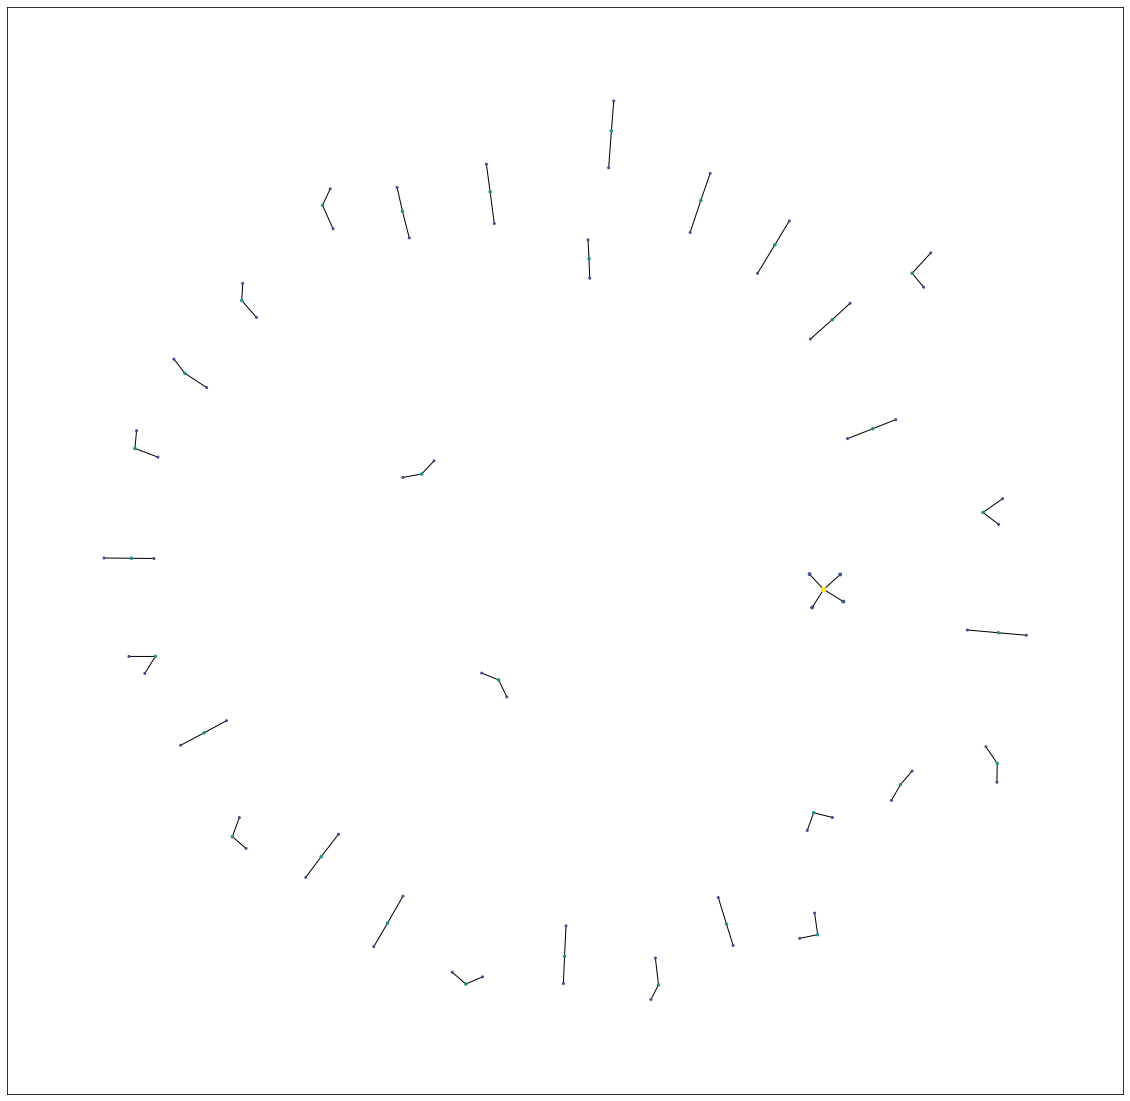

In [ ]:
#@title Betweenness Centrality and Visualization
pos=nx.spring_layout(fb_sub_graph)
betCent=nx.betweenness_centrality(fb_sub_graph,normalized=True,endpoints=True)
node_color=[20000.0*fb_sub_graph.degree(v)for v in fb_sub_graph]
node_size=[v*10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(fb_sub_graph,pos=pos,with_labels=False,node_color=node_color,node_size=node_size)
sorted(betCent,key=betCent.get,reverse=True)[:5]

In [ ]:
#@title Closeness Centrality
closeness_centrality=nx.centrality.closeness_centrality(fb_sub_graph2)
(sorted(closeness_centrality.items(),key=lambda item:item[1],reverse=True))[:8]

[('209848971662', 0.10526315789473684),
 ('1443601459220168', 0.10526315789473684),
 ('490550407734241', 0.10526315789473684),
 ('127749457401399', 0.10526315789473684),
 ('375996469260771', 0.10526315789473684),
 ('164861976892531', 0.10526315789473684),
 ('7684', 0.07017543859649122),
 ('3182', 0.07017543859649122)]

(-1.0207646594489768,
 1.1207011876826494,
 -1.0542584435343842,
 0.9547894676749001)

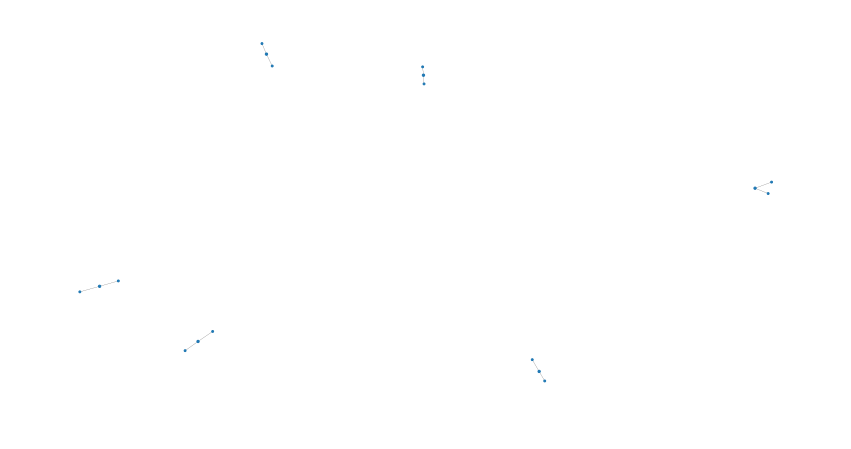

In [ ]:
node_size=[v*50 for v in closeness_centrality.values()]
plt.figure(figsize=(15,8))
nx.draw_networkx(fb_sub_graph2,pos=pos,node_size=node_size,with_labels=False,width=0.15)
plt.axis("off")